# ***DATASET***



1.   IMPORTING LIBRARIES

1.   UPLOAD

1.   LOAD

1.   INSPECT



In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from google.colab import files

In [42]:
#load dataset


data = pd.read_csv('yellow_tripdata_2015-01.csv')

#inspect dataset

print("Dataset info: ")
print(data.info())

print("\nFirst 5 rows: ")
print(data.head())


print(data.head(20))

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748986 entries, 0 to 12748985
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RateCodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.8+ GB
None

First 5 rows: 
   VendorID tpep_pickup_dateti

# ***DATA CLEANING***

In [25]:
#checking for missing values
print("/n MISSING VALUES")
print(data.isnull().sum())

/n MISSING VALUES
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    1
passenger_count          1
trip_distance            1
pickup_longitude         1
pickup_latitude          1
RateCodeID               1
store_and_fwd_flag       1
dropoff_longitude        1
dropoff_latitude         1
payment_type             1
fare_amount              1
extra                    1
mta_tax                  1
tip_amount               1
tolls_amount             1
improvement_surcharge    1
total_amount             1
dtype: int64


In [43]:
#drop rows with missing values in essential columns
essential_columns=['trip_distance','fare_amount','tpep_pickup_datetime','tpep_dropoff_datetime']
data= data.dropna(subset=essential_columns)

#remove invalid rows
data=data[(data['trip_distance']>0)&(data['fare_amount']>0)]

In [27]:
#Convert datetime columns to datetime type
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

#Verify the cleaned dataeset
print("\n Cleaned Dataset Info:")
print(data.info())


 Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 628405 entries, 0 to 632818
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               628405 non-null  int64         
 1   tpep_pickup_datetime   628405 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  628405 non-null  datetime64[ns]
 3   passenger_count        628405 non-null  float64       
 4   trip_distance          628405 non-null  float64       
 5   pickup_longitude       628405 non-null  float64       
 6   pickup_latitude        628405 non-null  float64       
 7   RateCodeID             628405 non-null  float64       
 8   store_and_fwd_flag     628405 non-null  object        
 9   dropoff_longitude      628405 non-null  float64       
 10  dropoff_latitude       628405 non-null  float64       
 11  payment_type           628405 non-null  float64       
 12  fare_amount            62

# ***EXPLORATORY DATA ANALYSIS ***



1.   Trip Distance Distribution
1.   Fare VS Tip Relationship
2.   Payment Method Distribuyion
2.   Daily Trip Volume



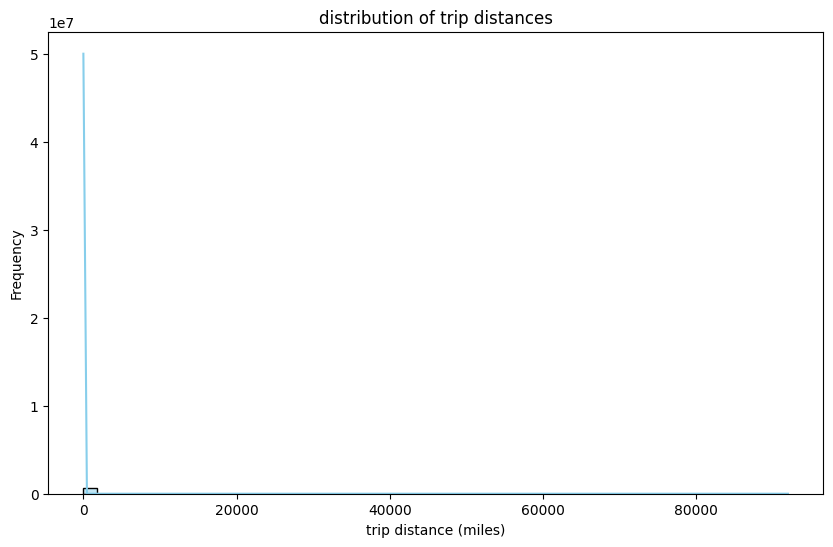

In [30]:
#trip distance distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.histplot(data['trip_distance'], kde=True,bins=50,color='skyblue')
plt.title('distribution of trip distances')
plt.xlabel('trip distance (miles)')
plt.ylabel('Frequency')
plt.show()

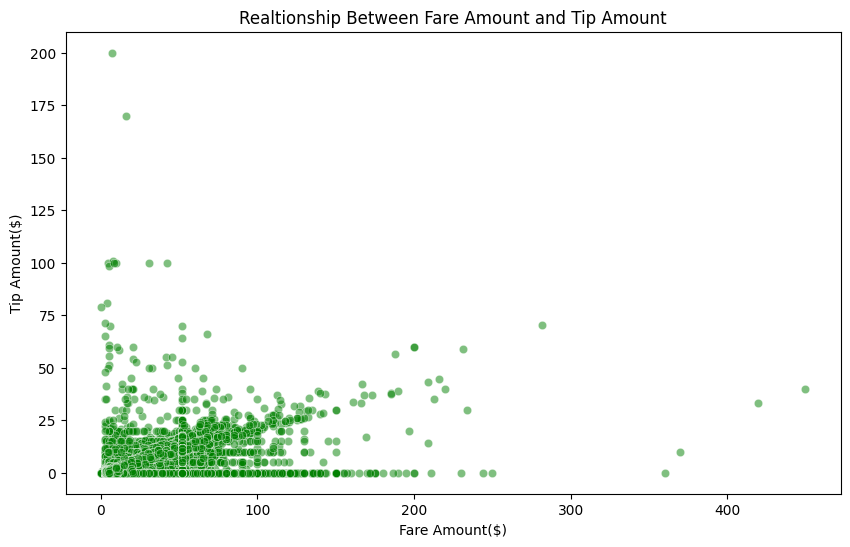

In [32]:
#fare vs tip relationship
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='fare_amount',y='tip_amount',alpha=0.5,color='green')
plt.title("Realtionship Between Fare Amount and Tip Amount")
plt.xlabel('Fare Amount($)')
plt.ylabel('Tip Amount($)')
plt.show()

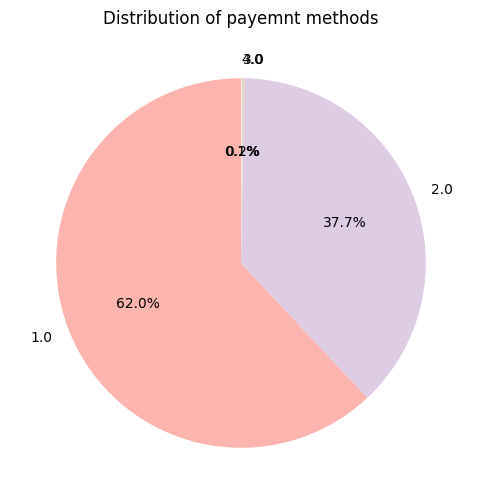

In [33]:
#payment method distribution
plt.figure(figsize=(8,6))
payment_counts =data['payment_type'].value_counts()
payment_counts.plot.pie(autopct='%1.1f%%',startangle=90,colormap='Pastel1')
plt.title('Distribution of payemnt methods')
plt.ylabel('')
plt.show()



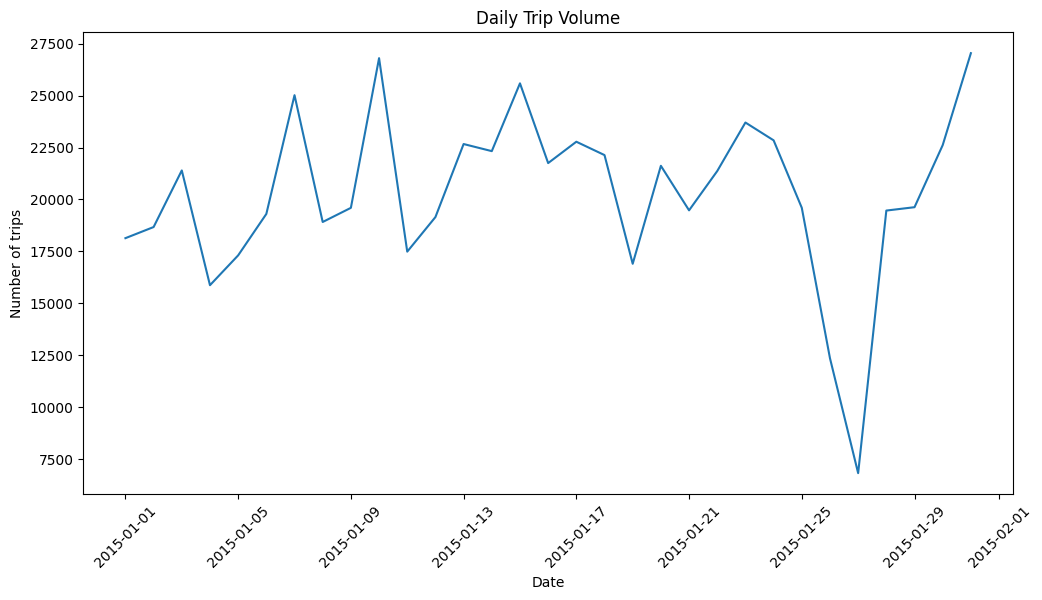

In [34]:
#daily trip volume

#extracing the pickup date
data['pickup_date']=data['tpep_pickup_datetime'].dt.date

#cgroup trips by date
daily_trips=data.groupby('pickup_date').size()

plt.figure(figsize=(12,6))
daily_trips.plot()
plt.title('Daily Trip Volume')
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.xticks(rotation=45)
plt.show()

# ***Future Trip Volume Predictions***



In [35]:
#Preparing data for prediction
trip_counts=data.groupby('pickup_date').size().reset_index(name='num_trips')
trip_counts['day_num']=np.arange(len(trip_counts))

In [38]:
# linear regression model
model=LinearRegression()
x=trip_counts[['day_num']]
y=trip_counts['num_trips']
model.fit(x,y)

LinearRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


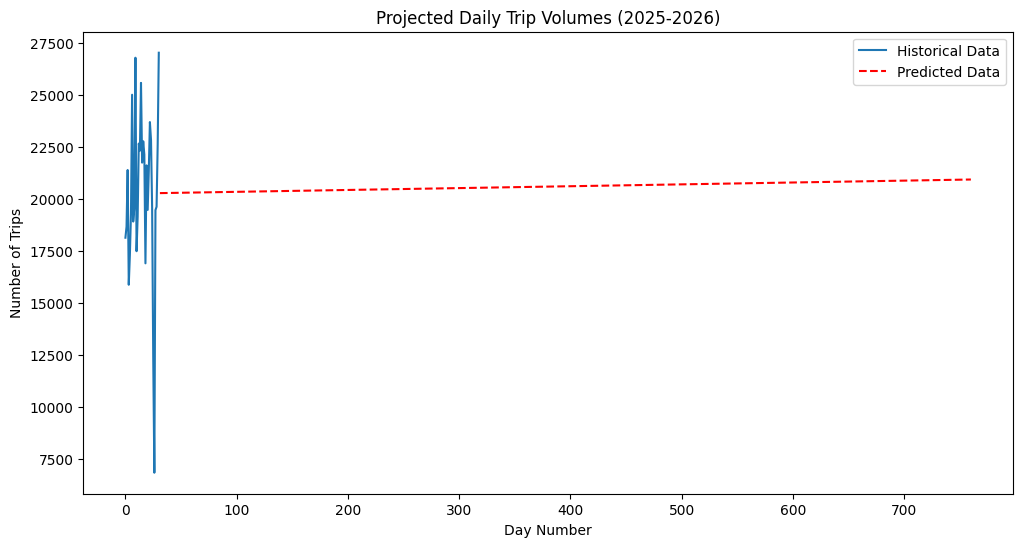

In [39]:
# Predict future trips (730 days for 2025-2026)
future_days = np.arange(len(trip_counts), len(trip_counts) + 730).reshape(-1, 1)
future_trips = model.predict(future_days)


plt.figure(figsize=(12, 6))
plt.plot(trip_counts['day_num'], y, label='Historical Data')
plt.plot(future_days, future_trips, label='Predicted Data', linestyle='--', color='red')
plt.title('Projected Daily Trip Volumes (2025-2026)')
plt.xlabel('Day Number')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()

# ***Analyze Cash Payments***

In [40]:
#calculate the percentage of trips with cash payments
cash_payment_percentage = (data['payment_type'] == 2).mean() *100
print(f"percentage of trips with cash paymebts: {cash_payment_percentage:.2f}%")

percentage of trips with cash paymebts: 37.73%


# ***saving dataset***

In [41]:
cleaned_file_name = 'cleaned_taxi_data.csv'
data.to_csv(cleaned_file_name, index=False)

# Download the file
files.download(cleaned_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>